In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

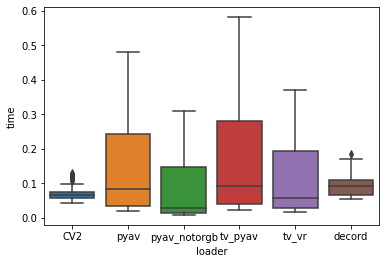

In [6]:
df = pd.read_csv("./basic_reading_speeds.csv")
ax = sns.boxplot(x="loader", y="time", data=df)

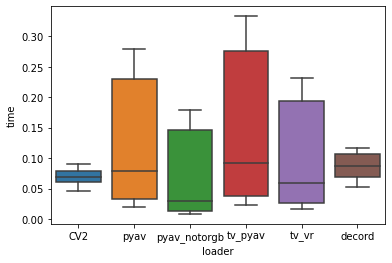

In [9]:
df = pd.read_csv("./basic_reading_speeds_tv05.csv")
ax = sns.boxplot(x="loader", y="time", data=df)

In [24]:
dfa = pd.read_csv("timeitcomp/basic_reading_speeds.csv")
dfa["tv_version"] = 0.8
dfb = pd.read_csv("timeitcomp/basic_reading_speeds_tv05.csv")
dfb["tv_version"] = 0.5
df = pd.concat([dfa, dfb])

In [10]:
df

,Unnamed: 0,loader,video,time
0,0,CV2,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.075567
1,1,pyav,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.035233
2,2,pyav_notorgb,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.016378
3,3,tv_pyav,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.038708
4,4,tv_vr,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.031132
...,...,...,...,...
4795,4795,pyav,v_SoccerJuggling_g23_c01.avi,0.085112
4796,4796,pyav_notorgb,v_SoccerJuggling_g23_c01.avi,0.035299
4797,4797,tv_pyav,v_SoccerJuggling_g23_c01.avi,0.098211
4798,4798,tv_vr,v_SoccerJuggling_g23_c01.avi,0.061938


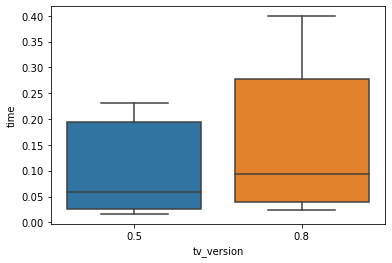

In [31]:
sns.boxplot(x="tv_version", y="time", data=df_ss, showfliers = False)

/home/bjuncek/miniconda3/envs/video_benchmark/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


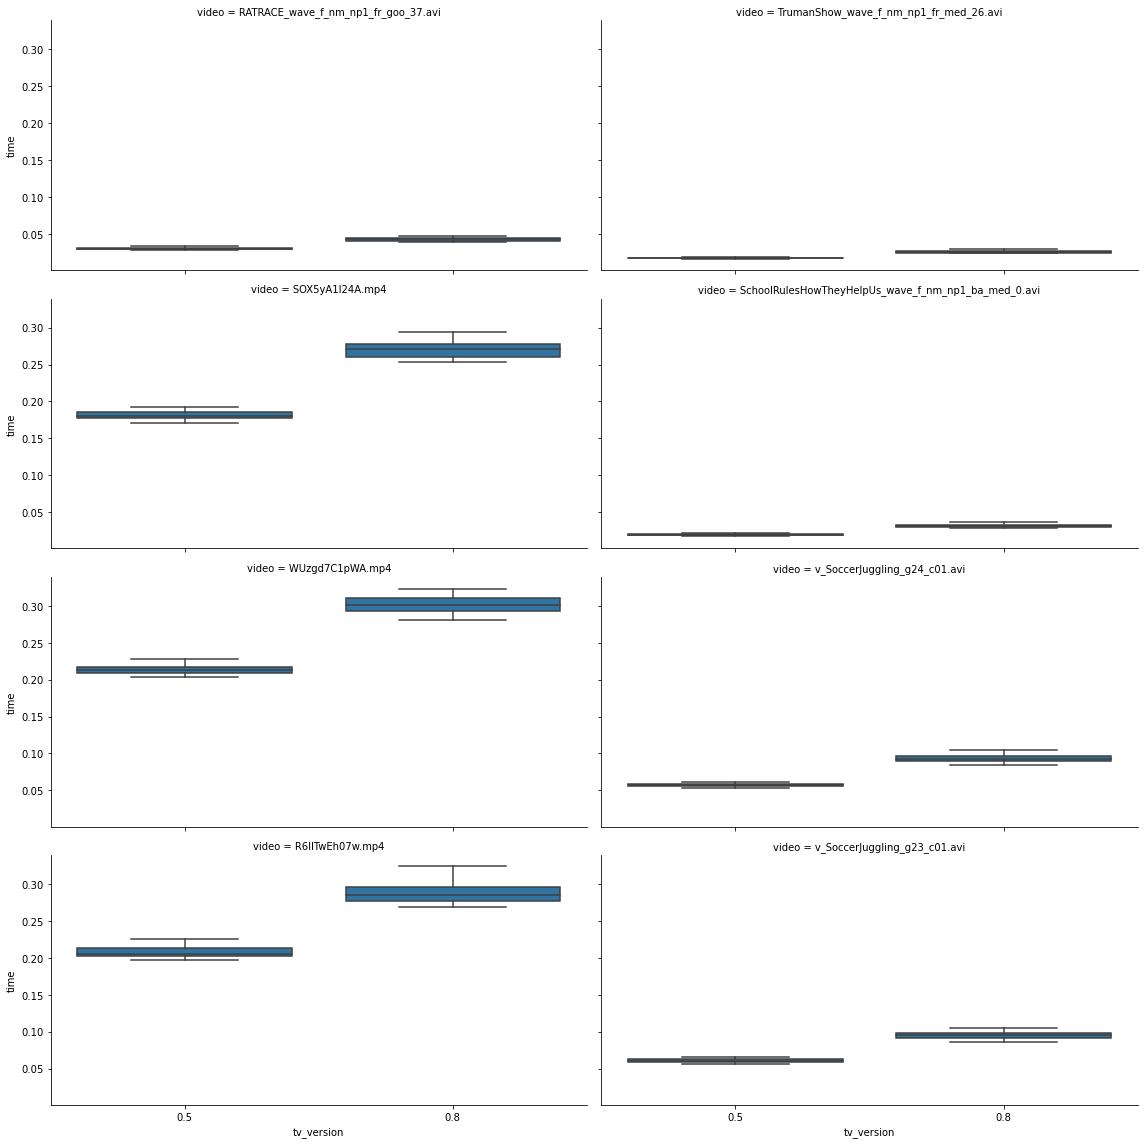

In [33]:
g = sns.FacetGrid(df_ss, col="video", col_wrap=2, height=4, aspect=2)
g = g.map(sns.boxplot, "tv_version", "time", showfliers = False)

/home/bjuncek/miniconda3/envs/video_benchmark/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


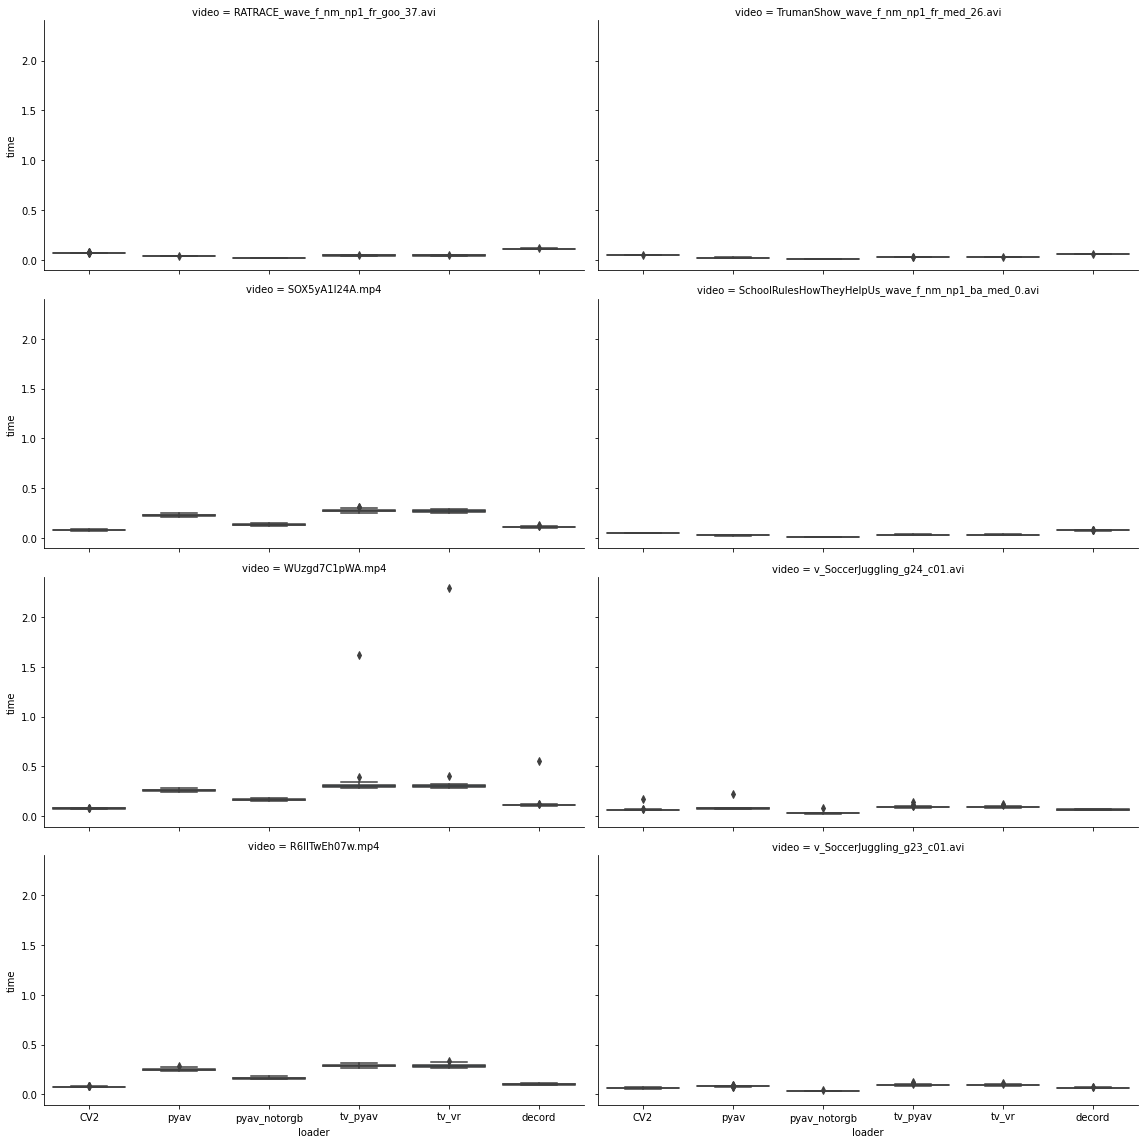

In [11]:
g = sns.FacetGrid(df, col="video", col_wrap=2, height=4, aspect=2)
g = g.map(sns.boxplot, "loader", "time")